In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Data

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head(5)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


## EDA

In [4]:
data_df = train_df.iloc[:,2:]

C:\Users\commo\AppData\Local\Temp\ipykernel_30452\4136255224.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(), annot=True, fmt=".2f")


<AxesSubplot: >

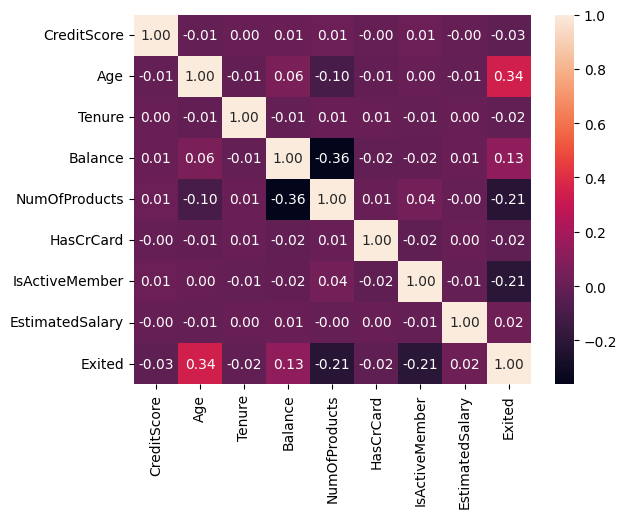

In [5]:
sns.heatmap(data_df.corr(), annot=True, fmt=".2f")

<AxesSubplot: xlabel='Age', ylabel='Count'>

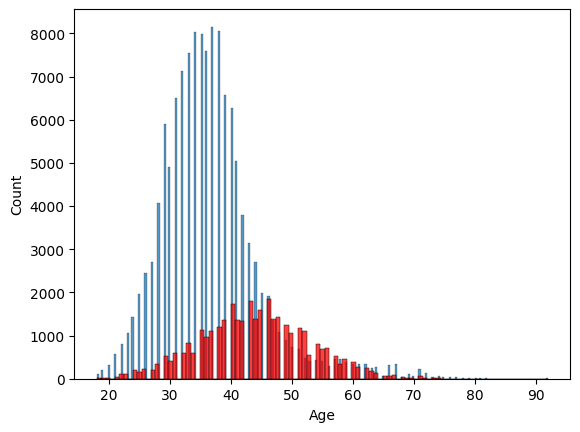

In [6]:
sns.histplot(data_df[data_df["Exited"] == 0]["Age"])
sns.histplot(data_df[data_df["Exited"] == 1]["Age"], color="red")

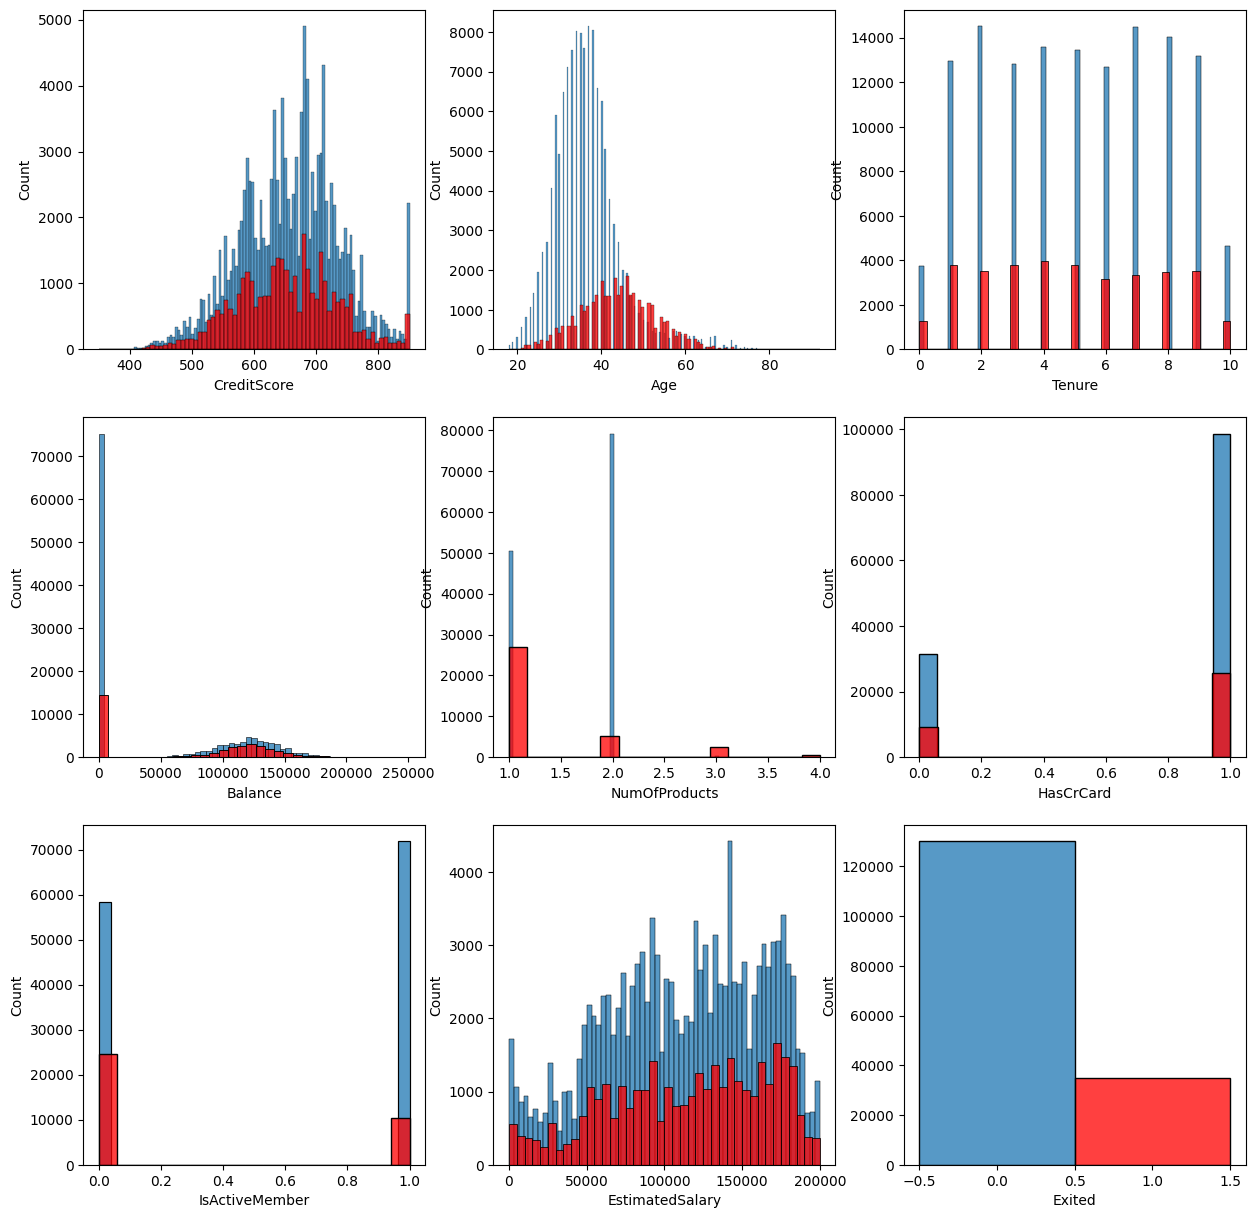

In [7]:
data_int_df = data_df.select_dtypes(include=["int64","float64"])

fig, axes = plt.subplots(3,3,figsize=(15,15))

for i in range(3):
    for j in range(3):
        sns.histplot(data_int_df[data_int_df["Exited"] == 0].iloc[:,i*3+j], ax=axes[i,j])
        sns.histplot(data_int_df[data_int_df["Exited"] == 1].iloc[:,i*3+j], ax=axes[i,j], color = "red")

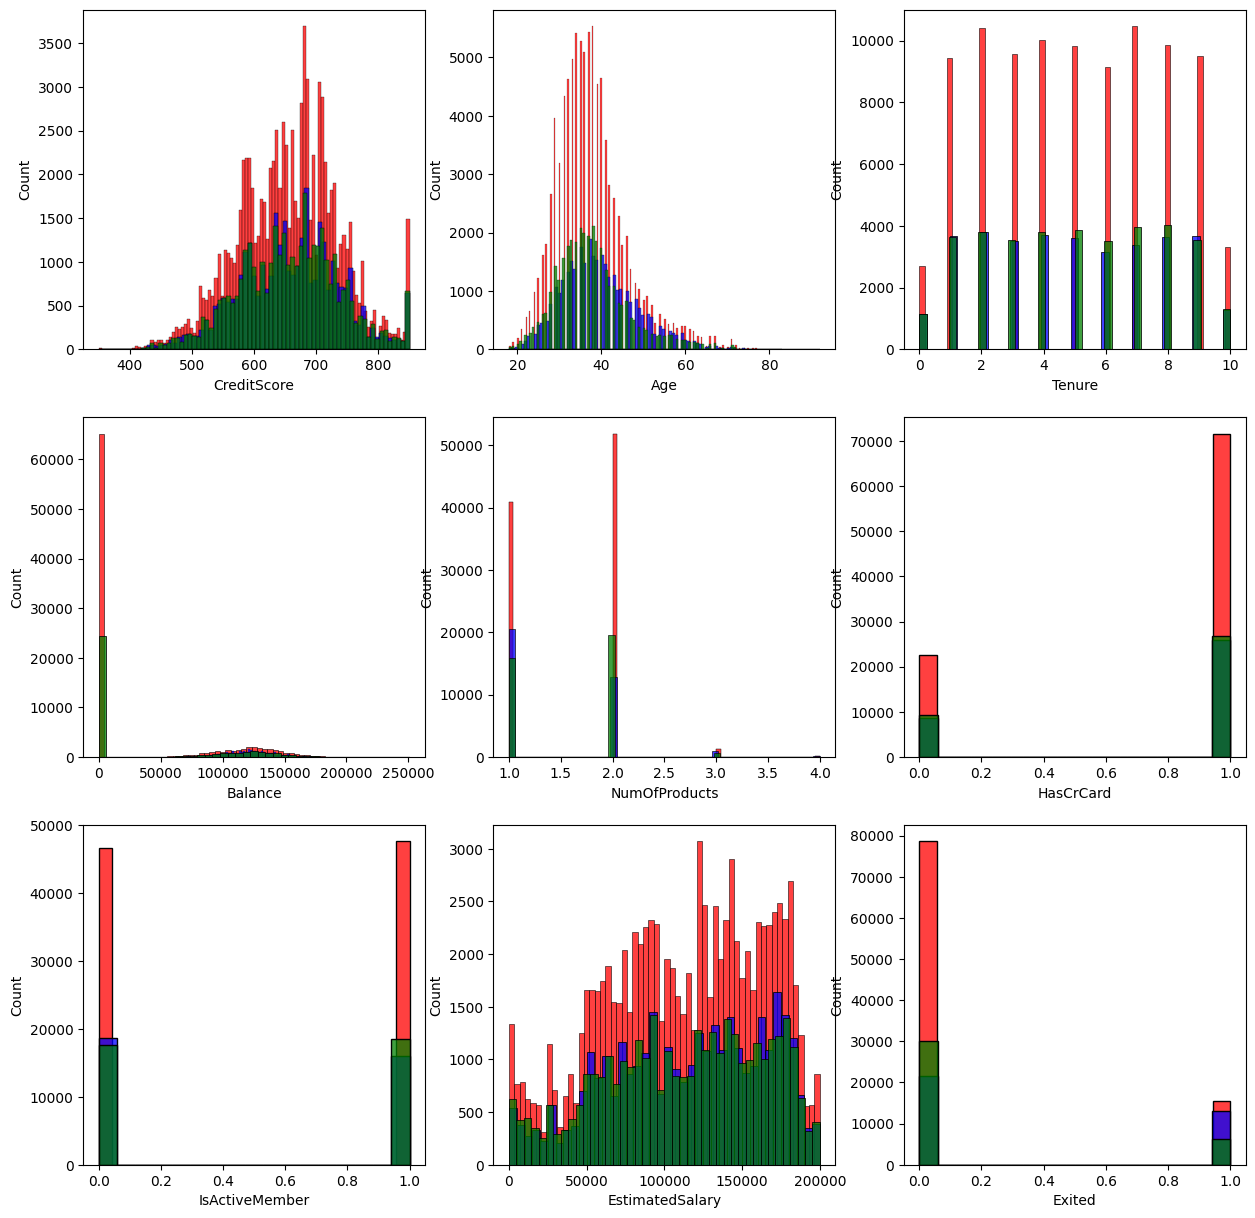

In [8]:
data_int_df = data_df.select_dtypes(include=["int64","float64"])
data_name_df = data_int_df.copy()
data_name_df["Surname"] = data_df["Surname"]
data_name_df["Geography"] = data_df["Geography"]
fig, axes = plt.subplots(3,3,figsize=(15,15))

for i in range(3):
    for j in range(3):
        #sns.histplot(data_int_df[data_int_df["Exited"] == 1].iloc[:,i*3+j], ax=axes[i,j], )
        #plot exiled by geography
        sns.histplot(data_name_df[data_name_df["Geography"] == "France"].iloc[:,i*3+j], ax=axes[i,j], color = "red", label="France")
        sns.histplot(data_name_df[data_name_df["Geography"] == "Germany"].iloc[:,i*3+j], ax=axes[i,j], color = "blue", label="Germany")
        sns.histplot(data_name_df[data_name_df["Geography"] == "Spain"].iloc[:,i*3+j], ax=axes[i,j], color = "green", label="Spain")
        

## Submission

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
import xgboost as xgb


In [10]:
x = data_int_df.drop("Exited", axis=1)
for column in data_int_df.select_dtypes(include=["float64"]).columns:
    data_int_df[column] = StandardScaler().fit_transform(data_int_df[column].values.reshape(-1,1))

# credit score
data_int_df["CreditScore"] = StandardScaler().fit_transform(data_int_df["CreditScore"].values.reshape(-1,1))

y = data_df["Exited"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
print(dt.score(x_test, y_test))

lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test))

xgboost = xgb.XGBClassifier(random_state=42)
xgboost.fit(x_train, y_train)
print(xgboost.score(x_test, y_test))


0.7863786469536765
0.7879237737449631
0.8549398612415549


In [12]:
features_df = 

SyntaxError: invalid syntax (3856787907.py, line 1)